# 01 Importing Libraries and Data 

In [106]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [107]:
# Configure API key
quandl.ApiConfig.api_key='DRRsNwu_RkcQiznZHKB3'

In [108]:
# Importing the US Federal Reserve Data Releases variable.\n",
data = quandl.get('FED/SUBLPDMHS_XWB_N_Q')

In [109]:
data.head()

,Value
Date,
2018-03-31,10.0
2018-06-30,5.3
2018-09-30,-13.3
2018-12-31,-12.0
2019-03-31,-1.7


In [110]:
data.shape

(22, 1)

In [111]:
data.columns

Index(['Value'], dtype='object')

In [112]:
# Plot the data using matplotlib
plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

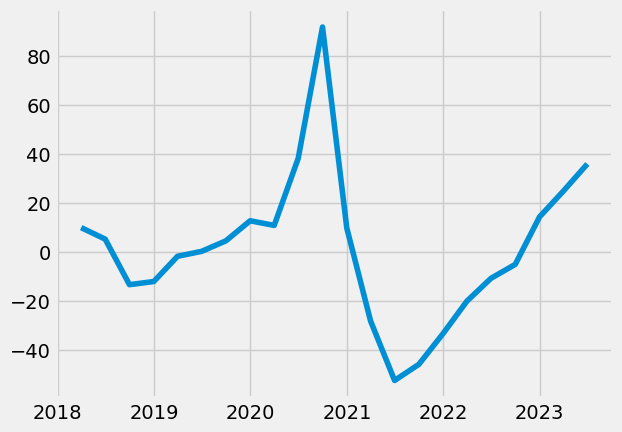

In [113]:
plt.plot(data)

# 02. Subsetting, wrangling, and cleaning time-series data

In [114]:
# Reset index so that you can use the \"Date\" column as a filter
data_2 = data.reset_index()

In [115]:
data_2.head()

,Date,Value
0,2018-03-31,10.0
1,2018-06-30,5.3
2,2018-09-30,-13.3
3,2018-12-31,-12.0
4,2019-03-31,-1.7


## 2b Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data. In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.

In [116]:
data_sub = data_2.loc[(data_2['Date'] >= '2018-06-30') & (data_2['Date'] < '2023-12-31')]

This is Official US figures on money supply, interest rates, mortgages, government finances, bank assets and debt, exchange rates, industrial production. So choosing 2018 and 2023 would enables business know the past and the current rates for appropriate forecast for the business. 

In [117]:
data_sub.shape

(21, 2)

In [118]:
data_sub.head()

,Date,Value
1,2018-06-30,5.3
2,2018-09-30,-13.3
3,2018-12-31,-12.0
4,2019-03-31,-1.7
5,2019-06-30,0.3


## 2c Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.

In [119]:
# Set the \"Date\" column as the index\n",
from datetime import datetime
data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from \"Date.
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the \"Date\" column.
data_sub.head()

,Value
datetime,
2018-06-30,5.3
2018-09-30,-13.3
2018-12-31,-12.0
2019-03-31,-1.7
2019-06-30,0.3


## 3 Create a line chart of your data.


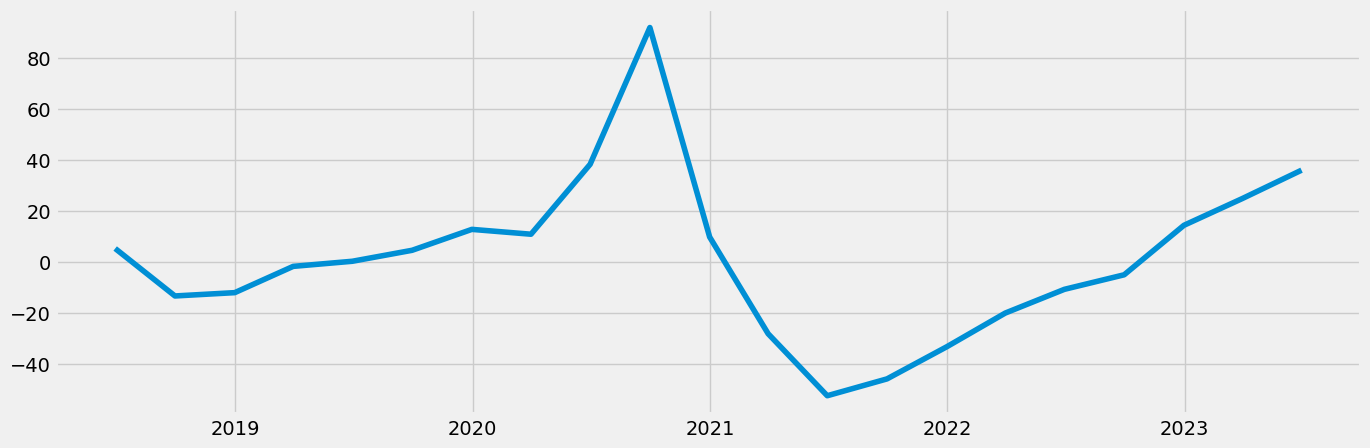

In [120]:
# Plot the new data set\n",
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [121]:
# Check for missing values (you shouldn't have any)\n",
data_sub.isnull().sum() 

Value    0
dtype: int64

In [122]:
# Check for duplicates
dups = data_sub[data_sub.duplicated()]
dups.sum()

Value    0.0
dtype: float64

In [123]:
dups # no duplicates

,Value
datetime,


## 4 Decompose the data’s components. Analyze the results from the plot in a markdown cell.

In [124]:
# Decompose the time series using an additive model\n",
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

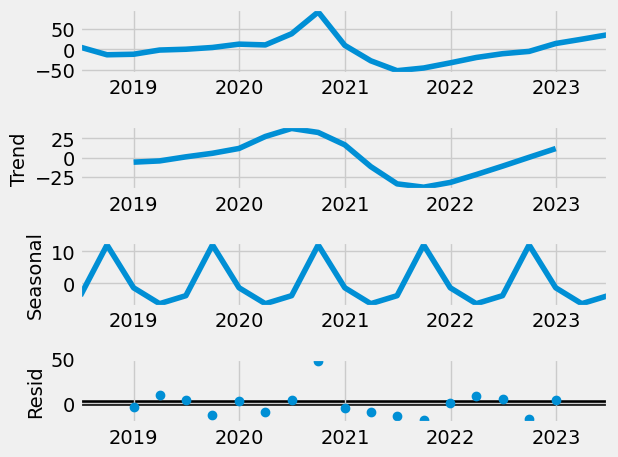

In [125]:
# Plot the separate components\n",
decomposition.plot()
plt.show()

## 5 Conduct a Dickey-Fuller test to check for stationarity. Interpret the results in a markdown cell and reference your null hypothesis.

In [126]:
 # The adfuller() function will import from the model from statsmodels for the test; however, running it will only return
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function
def dickey_fuller(timeseries): # Define the function\n",
        # Perform the Dickey-Fuller test:
        print ('Dickey-Fuller Stationarity test:')
        test = adfuller(timeseries, autolag='AIC')
        result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
        for key,value in test[4].items():
            result['Critical Value (%s)'%key] = value
        print (result)

In [127]:
# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.352970
p-value                         0.155453
Number of Lags Used             1.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


Considering the significance level of 5% with critical value of 5%, the test statistics in this case is larger than the critical value then "null hypothesis cannot be rejected as there is presence of a 'unit root' in the data. Therefore the data is Non-stationary

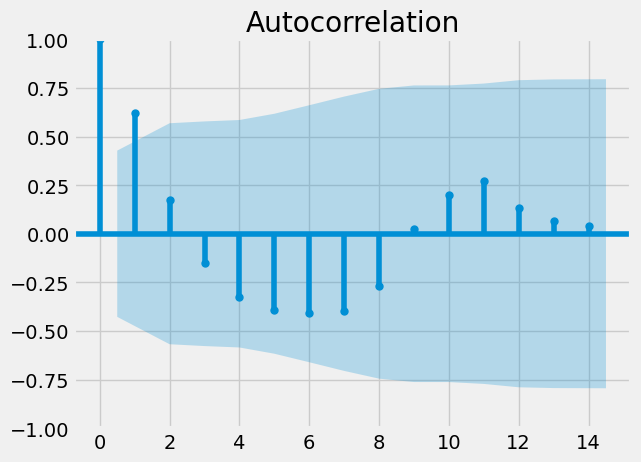

In [128]:
# Check out a plot of autocorrelations\n",   
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots
plot_acf(data_sub)
plt.show()

The autocorrelations shows there are two lines that are above the confidence interval which further shows that the data is non-stationary according to Dicker-Fuller test conduted. 

### 6. Stationarizing the US Federal Reserve Data Releases

In [129]:
data_diff = data_sub - data_sub.shift(1) 
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)"

In [130]:
# Here, you remove the missing values that came about as a result of the differencing
data_diff.dropna(inplace = True) 

In [131]:
data_diff.head()

,Value
datetime,
2018-09-30,-18.6
2018-12-31,1.3
2019-03-31,10.3
2019-06-30,2.0
2019-09-30,4.3


In [132]:
data_diff.columns

Index(['Value'], dtype='object')

In [133]:
data_diff.isnull().sum()

Value    0
dtype: int64

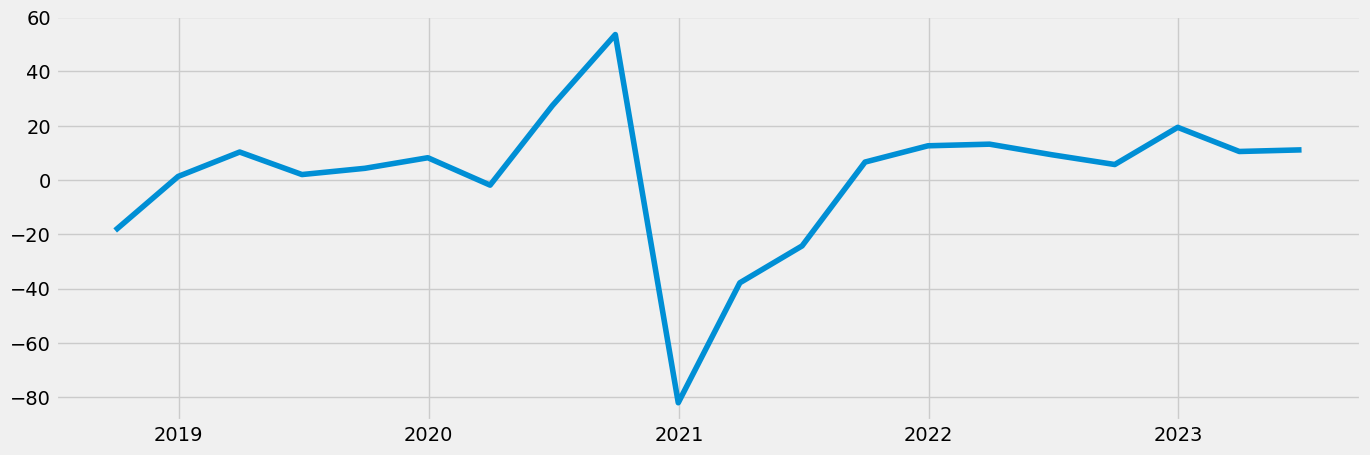

In [134]:
# Check out what the differencing did to the time-series curve\n",
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [135]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.120880
p-value                         0.236202
Number of Lags Used             8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


According to the result the data is still 'NON-STAIONARY' considering the test statistics larger than the critical value

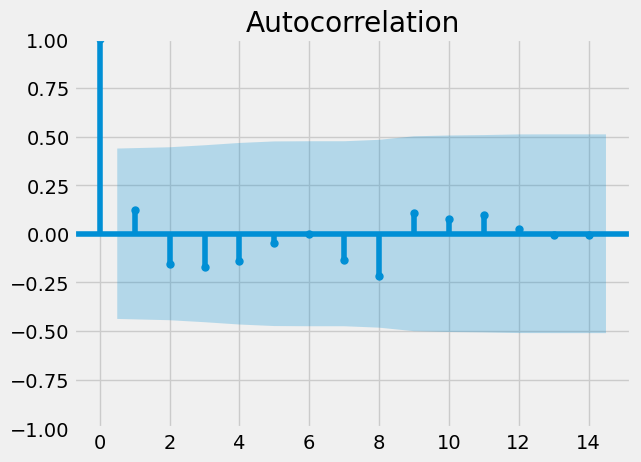

In [136]:
# Check out a plot of autocorrelations\n",   
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots
plot_acf(data_diff)
plt.show()

The second auto correlations shows a slight difference as only one value is out of the confidence level

In [137]:
#Performing another differencing on the data
data_diff_1 = data_sub - data_sub.shift(2)

In [138]:
# Here, you remove the missing values that came about as a result of the differencing
data_diff_1.dropna(inplace = True) 

In [139]:
data_diff_1.head()

,Value
datetime,
2018-12-31,-17.3
2019-03-31,11.6
2019-06-30,12.3
2019-09-30,6.3
2019-12-31,12.5


In [140]:
data_diff_1.isnull().sum()

Value    0
dtype: int64

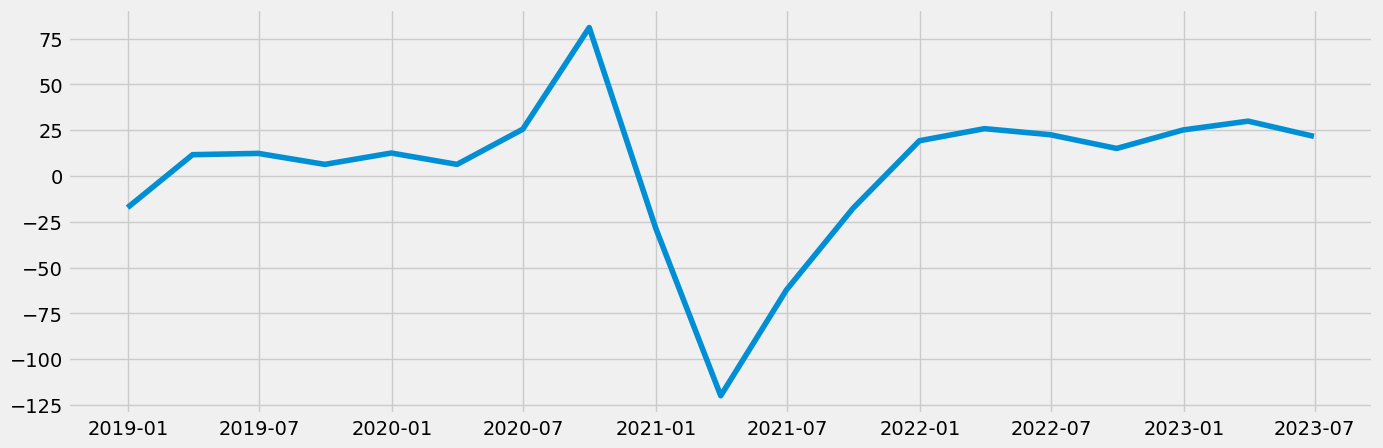

In [141]:
# Check out what the differencing did to the time-series curve\n",
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_1)

In [142]:
dickey_fuller(data_diff_1)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.197318
p-value                         0.020140
Number of Lags Used             7.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


The Test statistic is now smaller than the critical value at both the five and ten percent significance levels. Also there is a satisfactory p-value (p<0.05) which means I  can reject the null hypothesis and, as a result hence the series is Stationary.

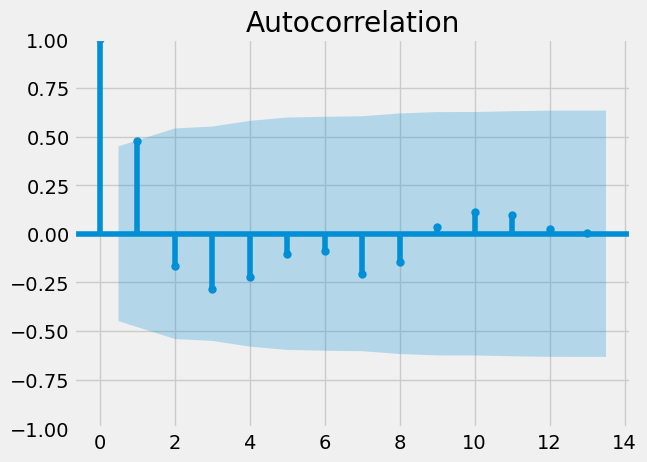

In [143]:
# Check out a plot of autocorrelations\n",   
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots
plot_acf(data_diff_1)
plt.show()

The autocorrelation is now perfect